## Data

The data is a set of 28 pixel by 28 pixel black and white pictures of handwritten digits between 0 and 9. It is a MNIST (Modified National Institute of Standards and Technology) data set originally created by Yann Lecun.  The data set I used is hosted Kaggle.com, under their competitions.

http://yann.lecun.com/exdb/mnist/ 

https://www.kaggle.com/c/digit-recognizer

The images have been converted to a csv file, where the first column, named 'label', is the digit that the picture is of, and the rest of the columns correspond to each pixel in the pictures. Each pixel column contains an integer between 0 and 255 to denote what shade that pixel is, where zero is white and 255 is black. Each row corresponds to a different digit image. The training data set is a set of 42,000 images, and the test data set is a set of 28,000 images.  I am just using 5000 of the training set values as my entire data set, for computing time reasons.

In [131]:
import pandas as pd
digits=pd.read_csv('/home/thyme/Stat-504/Final_Project/train.csv')
digits=digits.head(n=5000)
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
digits.iloc[0:5,400:420]

,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418
0,0,0,0,0,20,206,254,254,198,7,0,0,0,0,0,0,0,0,0,0
1,254,254,29,0,0,0,0,0,0,0,0,0,75,254,254,254,17,0,0,0
2,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,0,0
3,0,67,251,40,0,0,0,0,0,0,0,94,255,69,0,0,0,0,0,0
4,253,253,99,0,0,0,0,0,0,0,0,0,0,223,253,253,253,129,0,0


### Frequency chart of digit labels

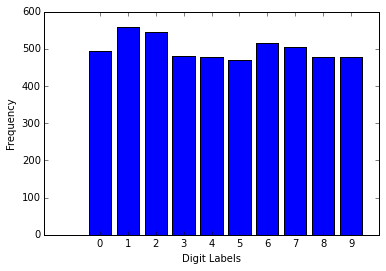

In [132]:
import collections
import matplotlib.pyplot as plt
%matplotlib inline

label=digits['label'].tolist()
histogram = collections.Counter(label)
plt.bar(range(len(histogram)), histogram.values(), align="center")
plt.xticks(range(len(histogram)), list(histogram.keys()))
plt.xlabel('Digit Labels')
plt.ylabel('Frequency')

## Analyses Run:

Using the data set with no added jitter:

Null

Naive Bayes

K-nearest neighbors:<br/>
n_neighbors=5 <br/>
For hyperparameter tuning, I used 10 fold cross validation maximizing accuracy score.

Logistic Regression:<br/>
C=.001<br/>
For hyperparameter tuning, I used 10 fold cross validation maximizing accuracy score.

Support Vector Classification, Gaussian Kernel:<br/>
gamma=0.052, C=1<br/>
For hyperparameter tuning, I used optunity, minimizing error rate.

Linear Support Vector Classification:<br/>
C=2.15443469e-02<br/>
For hyperparameter tuning, I used 10 fold cross validation maximizing accuracy score.

Decision Tree:<br/>
max_depth=100<br/>
For hyperparameter tuning, I used 10 fold cross validation maximizing accuracy score.

Bagged Decision Tree:<br/>
n_estimators=100<br/>
For hyperparameter tuning, I used 10 fold cross validation and the value of n_estimators that the accuracy score leveled off at.

Random Forest:<br/>
max_features=100, n_estimators=100<br/>
For hyperparameter tuning, I used 10 fold cross validation maximizing accuracy score for max_features, and he value of n_estimators that the accuracy score leveled off at.

Bernoulli Restricted Boltzmann Machine:<br/>
learning_rate=4.255, n_iter=78, n_components=50, C=.001
For hyperparameter tuning, I used optunity, minimizing error rate for learning_rate and n_iter.  Accuracy increases as n_components, so I picked the highest n_components I had time to run.

Using data set with added jitter:


## Results

In [135]:
print ('Accuracy score is the number of labels correctly predicted based on the pixels divided\n by the total number of labels predicted.\n')

print ('Null Model Accuracy Score: ' + str(null.mean()))
print ('Null Model Duration: ' + str(null_time))

print ('Naive Bayes Accuracy Score: ' + str(nbscores.mean()))
print ('Naive Bayes Duration: ' + str(nbtime_f))

print ('K-nearest Neighbors Accuracy Score: ' + str(knnscores.mean()))
print ('KNN Hyperparameter Optimization Duration: ' +str(k_p_time_f))
print ('KNN Model Duration: ' +str(k_m_time))
print ('KNN Total Duration: ' +str(k_time))

print ('Logistic Regression Accuracy Score: ' + str(logscores.mean()))
print ('Logistic Regression Hyperparameter Optimization Duration: ' +str(log_p_time))
print ('Logistic Regression Model Duration: ' +str(log_m_time))
print ('Logistic Regression Total Duration: ' +str(log_time))

print ('Gaussian SVC Accuracy Score: ' + str(svcgscores.mean()))
print ('Gaussian SVC Hyperparameter Optimization Duration: ' +str(svcg_p_time))
print ('Gaussian SVC Model Duration: ' +str(svcg_m_time))
print ('Gaussian SVC Total Duration: ' +str(svcg_time))

print ('Linear SVC Accuracy Score: ' + str(linearscores.mean()))
print ('Linear SVC Hyperparameter Optimization Duration: ' +str(svcl_p_time))
print ('Linear SVC Model Duration: ' +str(svcl_m_time))
print ('Linear SVC Total Duration: ' +str(svcl_time))

print ('Decision Tree Accuracy Score: ' + str(treescores.mean()))
print ('Decision Tree Hyperparameter Optimization Duration: ' +str(tree_p_time))
print ('Decision Tree Model Duration: ' +str(tree_m_time))
print ('Decision Tree Total Duration: ' +str(tree_time))

print ('Bagged Decision Tree Accuracy Score: ' + str(bagscores.mean()))
print ('Bagged Decision Tree Hyperparameter Optimization Duration: ' +str(bag_p_time))
print ('Bagged Decision Tree Model Duration: ' +str(bag_m_time))
print ('Bagged Decision Tree Total Duration: ' +str(bag_time))

print ('Random Forest Accuracy Score: ' + str(rfscores.mean()))
print ('Random Forest Hyperparameter Optimization Duration: ' +str(rf_p1_time+rf_p2_time))
print ('Random Forest Model Duration: ' +str(rf_m_time))
print ('Random Forest Total Duration: ' +str(rf_time))

print ('Bernoulli Restricted Boltzmann Machine Accuracy Score: ' + str(classifier_score.mean()))
print ('Bernoulli Restricted Boltzmann Machine Hyperparameter Optimization Duration: ' +str(rbm_p1_time))
print ('Bernoulli Restricted Boltzmann Machine Model Duration: ' +str(rbm_m_time))
print ('Bernoulli Restricted Boltzmann Machine Total Duration: ' +str(rbm_time))

print ('Jittered Data Naive Bayes Accuracy Score: ' + str(nb_accuracy))
print ('Jittered Data Naive Bayes Duration: ' + str(nbtime_jitter))

Accuracy score is the number of labels correctly predicted based on the pixels divided
 by the total number of labels predicted.

Null Model Accuracy Score: 0.1
Null Model Duration: 0.02741527557373047
Naive Bayes Accuracy Score: 0.827841817437
Naive Bayes Duration: 0.6535942554473877
K-nearest Neighbors Accuracy Score: 0.929401699992
KNN Hyperparameter Optimization Duration: 2307.7942476272583
KNN Model Duration: 45.65759992599487
KNN Total Duration: 2353.451847553253
Logistic Regression Accuracy Score: 0.863827482377
Logistic Regression Hyperparameter Optimization Duration: 3166.087608575821
Logistic Regression Model Duration: 102.44446992874146
Logistic Regression Total Duration: 3268.5320785045624
Gaussian SVC Accuracy Score: 0.953814050166
Gaussian SVC Hyperparameter Optimization Duration: 4386.42329955101
Gaussian SVC Model Duration: 319.96739625930786
Gaussian SVC Total Duration: 4706.390695810318
Linear SVC Accuracy Score: 0.897190690367
Linear SVC Hyperparameter Optimization D

## Conclusions

The top three accuracy scores without jitter were: <br/>
Gaussian SVC Accuracy Score: 0.953814050166<br/>
Random Forest Accuracy Score: 0.933596569359<br/>
K-nearest Neighbors Accuracy Score: 0.929401699992

The worst accuracy score by far was the RBM neural network model, which I would strongly suspect is due to poor hyperparameters.  I was experimenting with using optunity to optimize two hyperparameters at once, but in the case of RBM, it took so long to run that I wasn't able to run the optimization program as long as would probably have been ideal.  I think in this case, a better decision would be to optimize each hypreparameter separately, just for efficiency reasons.

For processing time reasons, the only classification method I tried with the jittered data was Naive Bayes, which actually got worse:

Naive Bayes Accuracy Score: 0.827841817437<br/>
Jittered Data Naive Bayes Accuracy Score: 0.777356209508

## Data processing

In [133]:
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import time
import optunity
import optunity.metrics
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


pixels=digits.iloc[:,2:]
pixels = np.asarray(pixels, 'float32')
X = pixels/255.0

## Null Model

In [72]:
start = time.time()

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pixels, label, random_state=1)

null = pd.Series(y_test).value_counts() / len(y_test)
null.mean()

end = time.time()
null_time=end-start

## Naive Bayes

In [134]:
start = time.time()
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nbscores = cross_val_score(nb, pixels, label, cv=10, scoring='accuracy')
nbscores
end = time.time()
nbtime_f=end-start

## K-nearest Neighbors

### Find optimal parameter value

In [21]:
start = time.time()
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, pixels, label, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)
end = time.time()
k_p_time_f=end-start

[0.93280424184329791, 0.91682480049446602, 0.92859479265949418, 0.92858570606147484, 0.92940169999161204, 0.92859449830722396, 0.9279871655506019, 0.92520150902943765, 0.92560922143629853, 0.92482046894834247, 0.92401234734176507, 0.92261464940734683, 0.92161746338643646, 0.91960771496134386, 0.91420430750349568, 0.91521400959465748, 0.91240743881998543, 0.91161699251123396, 0.90961853477944088, 0.909223341295054, 0.90701518316795604, 0.90641842219337221, 0.90642479021707723, 0.9072248678740028, 0.90561752410336216, 0.90381826805466403, 0.90221978612673692, 0.90201576981132037, 0.89981924712887518, 0.89822001007821051, 0.89681952246585372, 0.89641549991514025, 0.89620984468572407, 0.89342703895731024, 0.89162937797926944, 0.89242980928942595, 0.89104259541258579, 0.89182778891351089, 0.89203540292968275, 0.88963573958390119, 0.88982929894817209, 0.88923249918306069, 0.88863401712889556, 0.88743403029927548, 0.887032731103783, 0.88483465179248599, 0.88623272146511278, 0.8842305839437854

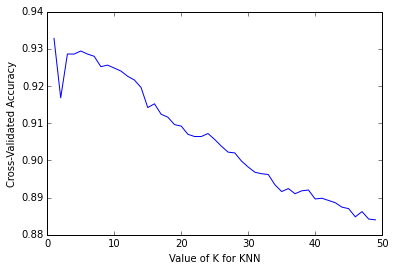

In [22]:
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### 10-fold cross-validation with the best KNN model

In [24]:
start = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knnscores = cross_val_score(knn, pixels, label, cv=10, scoring='accuracy')
knnscores
knnscores.mean()
end = time.time()
k_m_time=end-start
k_time=k_p_time_f+k_m_time

## Logistic Regression

In [43]:
start = time.time()
from sklearn.linear_model import LogisticRegression
c_range = [.0001,.001,.01, .1,1, 10, 100, 1000, 5000]
c_scores = []
for c in c_range:
    logistic = linear_model.LogisticRegression(C=c)
    scores = cross_val_score(logistic, pixels, label, cv=10, scoring='accuracy')
    c_scores.append(scores.mean())
print (c_scores)
end = time.time()
log_p_time=end-start

[0.87882703713317234, 0.86382748237714824, 0.84863082291234915, 0.83343906449529237, 0.82043764562586108, 0.81902591729125773, 0.8174358494337095, 0.81803671086872798, 0.81763026185485432]


In [44]:
start = time.time()
logistic = linear_model.LogisticRegression(C=.001)
logscores = cross_val_score(logistic, pixels, label, cv=10, scoring='accuracy')
logscores
logscores.mean()
end = time.time()
log_m_time=end-start
log_time=log_p_time+log_m_time

## SVC Gaussian - one vs one

One vs. one classification is a method that can be used to extend Support Vector Classification to support multiple classes (i.e. more than two classes).  It consists of n_classes * (n_classes - 1) / 2 classifier, one for each pair of classes.  During prediction, it predicts the label by which label was selected the most, amongst all the classification pairs.

### Find optimal parameter values

I'm experimenting with using optunity to optimize two hyperparameters at once.  I'm using error rate instead of accuracy score to optimize the hyperparameters, since it is as close to accuracy score as I can get using optunity.

In [53]:
start=time.time()
import random
random.seed(1)
import optunity
import optunity.metrics
import sklearn.svm
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=1234567)
@optunity.cross_validated(x=X_train, y=y_train, num_folds=5)
def svm_error_rate(x_train, y_train, x_test, y_test, C, gamma):
    model =  sklearn.svm.SVC(C=C, gamma=gamma)
    model.fit(x_train, y_train)
    resp = model.predict(x_test)
    error_rate = (y_test != resp).mean()
    return error_rate
optimal_parameters, details, _ = optunity.minimize(svm_error_rate, num_evals=50,
                                                   C=[0, 5], gamma=[0, 1])
print("Optimal parameters: C=%1.3f, gamma=%1.3f" % (optimal_parameters['C'], optimal_parameters['gamma']))
print("Cross-validated error rate: %1.3f" % details.optimum)
end = time.time()
svcg_p_time=end-start

Optimal parameters: C=1.031, gamma=0.052
Cross-validated error rate: 0.059


In [55]:
start = time.time()
clf = sklearn.svm.SVC(gamma=0.052, C=1)
svcgscores = cross_val_score(clf, X, label, cv=10, scoring='accuracy')
svcgscores
svcgscores.mean()
end = time.time()
svcg_m_time=end-start
svcg_time=svcg_p_time+svcg_m_time

## Linear SVC

This uses one vs. all classification as the method to extend Support Vector Classification to support multiple classes. For each class (in this case for each digit), it classifies it as that one digit, vs all the rest of the digits.

In [49]:
start = time.time()
from sklearn.svm import LinearSVC
C_range = np.logspace(-2, 10, 13)
C_scores = []
for c in C_range:
    linear = LinearSVC(C=c)
    scores = cross_val_score(linear, X, label, cv=10, scoring='accuracy')
    C_scores.append(scores.mean())
print (C_scores)
print (C_range)
end = time.time()
svcl_p_time=end-start

[0.89378529660885486, 0.89219400305942931, 0.86961291368599336, 0.84901183245542455, 0.84421332539522242, 0.84202330152380855, 0.84222450814638383, 0.84301530043872486, 0.84321042448823091, 0.84681790492617581, 0.84180999498361542, 0.84221284413515796, 0.84281639006057163]
[  1.00000000e-02   1.00000000e-01   1.00000000e+00   1.00000000e+01
   1.00000000e+02   1.00000000e+03   1.00000000e+04   1.00000000e+05
   1.00000000e+06   1.00000000e+07   1.00000000e+08   1.00000000e+09
   1.00000000e+10]


In [50]:
start = time.time()
from sklearn.svm import LinearSVC
C_range = np.logspace(-5, 0, 10)
C_scores = []
for c in C_range:
    linear = LinearSVC(C=c)
    scores = cross_val_score(linear, X, label, cv=10, scoring='accuracy')
    C_scores.append(scores.mean())
print (C_scores)
print (C_range)
end = time.time()
svcl_p_time=end-start

[0.77259237314316775, 0.80240858776369228, 0.838029149217842, 0.86679556647091327, 0.88638248589725266, 0.89438330350984052, 0.89719069036721422, 0.89459091883480846, 0.88019094372715156, 0.87041494669808728]
[  1.00000000e-05   3.59381366e-05   1.29154967e-04   4.64158883e-04
   1.66810054e-03   5.99484250e-03   2.15443469e-02   7.74263683e-02
   2.78255940e-01   1.00000000e+00]


In [51]:
start = time.time()
from sklearn.svm import LinearSVC
linear = LinearSVC(C=2.15443469e-02)
linearscores = cross_val_score(linear, X, label, cv=10, scoring='accuracy')
linearscores
linearscores.mean()
end = time.time()
svcl_m_time=end-start
svcl_time=svcl_p_time+svcl_m_time

## Decision Tree

### Find optimal parameter value

In [26]:
start = time.time()
from sklearn.tree import DecisionTreeClassifier

depth_range = range(1, 501, 100)
depth_scores = []
for d in depth_range:
    dclf = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(dclf, pixels, label, cv=10, scoring='accuracy')
    depth_scores.append(scores.mean())
print (depth_scores)
end = time.time()
tree_p_time=end-start

[0.19019279282174031, 0.77223915923539688, 0.76464168570703694, 0.76606914335472986, 0.76381906834278612]


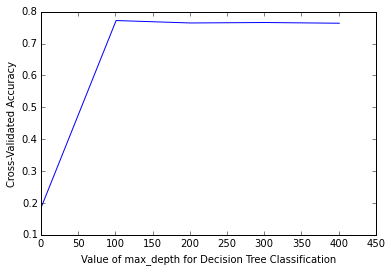

In [27]:
%matplotlib inline

plt.plot(depth_range, depth_scores)
plt.xlabel('Value of max_depth for Decision Tree Classification')
plt.ylabel('Cross-Validated Accuracy')

### 10-fold cross-validation with the best Decision Tree model

In [29]:
start = time.time()
treeclf = DecisionTreeClassifier(max_depth=100, random_state=1) 
treescores = cross_val_score(treeclf, pixels, label, cv=10, scoring='accuracy')
treescores
treescores.mean()
end = time.time()
tree_m_time=end-start
tree_time=tree_p_time+tree_m_time

## Bagged Decision Tree

### Find optimal parameter value

In [31]:
start = time.time()
from sklearn.ensemble import BaggingClassifier

potential_n = range(10, 510, 100)
bag_scores = []
for n in potential_n:
    bagclass = BaggingClassifier(treeclf,n_estimators=n, random_state=1)
    scores = cross_val_score(bagclass, pixels, label, cv=10, scoring='accuracy')
    bag_scores.append(scores.mean())
print (bag_scores)
end = time.time()
bag_p_time=end-start

[0.87540266169265668, 0.91660312210825834, 0.91860840832202462, 0.91841121459252084, 0.91880314633090376]


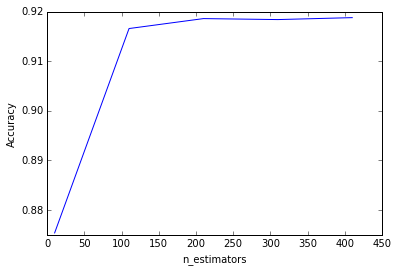

In [32]:
start = time.time()
plt.plot(potential_n, bag_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

### 10-fold cross-validation with the best Bagged Decision Tree model

In [33]:
start = time.time()
bagging=BaggingClassifier(treeclf,n_estimators=100, random_state=1) #adjust later
bagscores = cross_val_score(bagging, pixels, label, cv=10, scoring='accuracy')
bagscores
bagscores.mean()
end = time.time()
bag_m_time=end-start
bag_time=bag_p_time+bag_m_time

## Random Forest Classification

### Find optimal parameter values

### n_estimators:

In [35]:
start = time.time()
from sklearn.ensemble import RandomForestClassifier

potential_n = range(10, 510, 100)
forest_scores = []
for n in potential_n:
    rfclass = RandomForestClassifier(n_estimators=n, random_state=1)
    scores = cross_val_score(rfclass, pixels, label, cv=10, scoring='accuracy')
    forest_scores.append(scores.mean())
print (forest_scores)
end = time.time()
rf_p1_time=end-start

[0.87740143112623348, 0.9366181124611529, 0.94022021944236334, 0.93861699043582747, 0.93841012645055033]


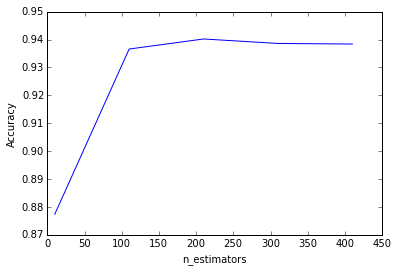

In [36]:
plt.plot(potential_n, forest_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

### Max Features:

In [38]:
start = time.time()
feature_range = range(1, 785, 100)
forest_scores = []
for feature in feature_range:
    rfclass = RandomForestClassifier(n_estimators=100, max_features=feature, random_state=1)
    scores = cross_val_score(rfclass, pixels, label, cv=10, scoring='accuracy')
    forest_scores.append(scores.mean())
print (forest_scores)
end = time.time()
rf_p2_time=end-start

[0.92202256749311662, 0.9344196324911207, 0.93320945244532005, 0.92680637659875686, 0.92501757430376141, 0.9260099292248547, 0.92180814473895223, 0.9160162997139274]


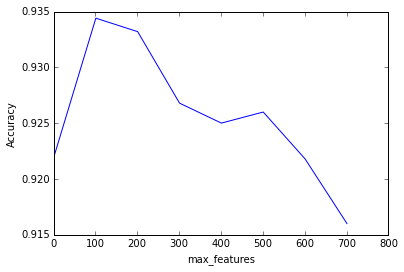

In [40]:
plt.plot(feature_range, forest_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

### 10-fold cross-validation with the best Random Forest model

In [41]:
start = time.time()
rfclass=RandomForestClassifier(n_estimators=100, max_features=100, random_state=1)
rfscores = cross_val_score(rfclass, pixels, label, cv=10, scoring='accuracy')
rfscores
rfscores.mean()
end = time.time()
rf_m_time=end-start
rf_time=rf_p1_time+rf_p2_time+rf_m_time

## Bernoulli Restricted Boltzmann Machine (RBM)

This is a form of neural network machine learning where the inputs are either 0 and 1, or a proportion that represents the probability that something exists.  So this method works well for cases like the digit dataset, where there are characters to detects, but would perform poorly if the image were colorful and complex.

### Define the models

In this case, I'm using logistic regression as the function in the neural network hidden layer.

In [21]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

### Find optimal hyper-parameters

In [57]:
start=time.time()
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=1234567)
@optunity.cross_validated(x=X_train, y=y_train, num_folds=5)
def rbm_error_rate(x_train, y_train, x_test, y_test, n_iter, learning_rate):
    rbm = BernoulliRBM(random_state=0, learning_rate=learning_rate, n_iter=n_iter)
    model =  classifier
    model.fit(x_train, y_train)
    resp = model.predict(x_test)
    error_rate = (y_test != resp).mean()
    return error_rate
optimal_parameters, details, _ = optunity.minimize(rbm_error_rate, num_evals=10,
                                                   n_iter=[0, 500], learning_rate=[0, 5])
print("Optimal parameters: n_iter=%1.3f, learning_rate=%1.3f" % (optimal_parameters['n_iter'], optimal_parameters['learning_rate']))
print("Cross-validated error rate: %1.3f" % details.optimum)
end = time.time()
rbm_p1_time=end-start

[BernoulliRBM] Iteration 1, pseudo-likelihood = -141.05, time = 2.86s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -137.32, time = 3.18s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -116.81, time = 3.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -108.64, time = 3.02s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -99.19, time = 3.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -104.82, time = 3.22s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -102.05, time = 3.28s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -97.95, time = 3.47s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -100.09, time = 3.15s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -99.39, time = 3.52s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -150.80, time = 2.86s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -139.27, time = 3.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -116.70, time = 3.04s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -128.61, time = 3.17s
[BernoulliRBM] Iterati

In [67]:
start=time.time()
logistic = linear_model.LogisticRegression(C=.001)
rbm = BernoulliRBM(random_state=1, learning_rate=4.255, n_iter=78, n_components=50)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

classifier_score=cross_val_score(classifier, X, label, cv=10, scoring='accuracy')
print (classifier_score.mean())
end = time.time()
rbm_m_time=end-start
rbm_time=rbm_p1_time+rbm_m_time

0.111600591251


## Submit Solution to Kaggle

I will run this later, when I have time to run the whole training data set, but here is the code.

In [ ]:
import pandas as pd

digits_train <- pd.read_csv(".../train.csv")
digits_test <- pd.read_csv(".../test.csv")

from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

label_train=digits_train['label'].tolist()
pixels=digits_train.iloc[:,2:]
pixels = np.asarray(pixels, 'float32')
X_train = pixels/255.0
X_test = np.asarray(digits_test, 'float32')/255.0
#use best method and training set to find hyperparameters and train model
# Pretend we're using ann rbm for now:
classifier.fit(X_train, label_train)
predictions= np.asarray(classifier.predict(X_test))

predictions.to_csv('/home/thyme/Stat Analytics/smalldigitstrain.csv') #change later


## Jitter data set

I'm using code from sklearn to increase the training data set and it's variability by slightly shifting the pixels in the images.  This will expand the data set from 5,000 to 25,000, so I just ran the fastest model (Naive Bayes).

In [93]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline


###############################################################################
# Setting up

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((28, 28)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

In [126]:
import pandas as pd
digits=pd.read_csv('/home/thyme/Stat-504/Final_Project/train.csv')
digits=digits.head(n=5000)
pixels=digits.iloc[:,1:]
pixels = np.asarray(pixels, 'float32')
label=digits['label'].tolist()
label=np.asarray(label, 'float32')
pixels, label = nudge_dataset(pixels, label)
X = pixels/255.0

In [127]:
start = time.time()
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nbscores = cross_val_score(nb, pixels, label, cv=10, scoring='accuracy')
nbscores
nb_accuracy=nbscores.mean()
end = time.time()
nbtime_jitter=end-start

## Next Steps

-Add Convolutional Neural Nets.<br />
-Run models with full training set. <br />
-Pick best model and submit the Kaggle.